## Jobs vs. Gates

Стив Джобс известен как хороший презентер. В интернет ходят мемы про то, как он использует много позитивных прилагательных вроде **brilliant**, чтобы придать речи позитивности. Давайте проанализируем особенности речи Стива Джобса, и сравним с Биллом Гейтсом, на основе двух видео из YouTube:
* [Steve Jobs представляет iPad в 2010 г.](https://www.youtube.com/watch?v=zZtWlSDvb_k) (справедливости ради, в этой презентации участвуют и другие сотрудники Apple)
* [Bill Gates Harvard Commencement Address](https://www.youtube.com/watch?v=zPx5N6Lh3sw)

Поскольку нам придётся использовать нейросеть [**OpenAI Whisper**](https://github.com/openai/whisper) для транскрибации речи, переключимся на поддержку GPU в Google Colab в меню **Runtime -> Change Runtime Type -> T4 GPU**.

> Google Colab предоставляет ограниченные бесплатные ресурсы GPU, обычно это несколько часов в день - это стоит учитывать при работе над своим проектом. Ресурсы GPU нужны только на момент распознавания аудио, но при переключении обратно на CPU теряются все файлы в локальном хранилище. Вы можете скачать распознанные текстовые файлы, переключиться на CPU, и снова загрузить их в хранилище.

### Скачиваем аудиодорожки для видео

Для работы с YouTube-видео в Python есть специальные библиотеки. С помощью них мы можем выделить в видео аудио-дорожку, и скачать её на локальный диск.

Зададим словарь с адресами видеороликов:

In [44]:
videos = {
    "jobs" : "https://www.youtube.com/watch?v=zZtWlSDvb_k",
    "gates" : "https://www.youtube.com/watch?v=zPx5N6Lh3sw"
}


Теперь используем библиотеку PyTube для скачивания видео:

In [2]:
%pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00


In [45]:
from pytube import YouTube

for p,url in videos.items():
  print(f"Скачиваем {p}.mp3")
  YouTube(url).streams.filter(only_audio=True).first().download(filename=f"{p}.mp3")

Скачиваем jobs.mp3
Скачиваем gates.mp3


В результате в нашей рабочей директории появились файлы `jobs.mp3` и `gates.mp3`.

### Распознаём речь при помощи OpenAI Whisper

Теперь нам нужно преобразовать аудиодорожку в текст. Для этого будем использовать бесплатную модель Whisper от OpenAI. Установим соответствующую библиотеку:

In [4]:
%pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-ko4lks99
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-ko4lks99
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-m

После этого для распознавания нам станет доступна команда `whisper`, которой необходимо передать имя звукового файла для распознавания.

> Whisper содержит несколько моделей. По умолчанию используется небольшая модель, дающая оптимальное сочетание по скорости и качеству распознавания. Чтобы повысить качество распознавания, можно передать в команду параметр `--model large.v3`, это может немного повысить качество, но при этом существенно замедлит скорость распознавания.

In [46]:
!whisper jobs.mp3 --output_format "txt"

Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: English
[00:00.000 --> 00:29.920]  Thank you, thanks for coming today, thank you, thank you, thank you, good morning.
[00:30.500 --> 00:34.040]  And thank you all for coming today.
[00:34.040 --> 00:44.160]  We want to kick off 2010 by introducing a truly magical and revolutionary product today.
[00:44.160 --> 00:48.960]  But before we get to that, I've just got a few updates.
[00:48.960 --> 00:54.320]  The first is an update about iPods.
[00:54.320 --> 01:11.280]  A few weeks ago, we sold our 250 millionth iPod and iPods have changed the way we discover
[01:11.280 --> 01:16.640]  and purchase and enjoy music and with 250 million of them, I just didn't want to let
[01:16.640 --> 01:20.600]  this moment pass without just recognizing it.
[01:20.600 --> 01:25.560]  It's pretty amazing and so that's our first update.
[01:25.560 --> 01:29.160]  Second update is about our retail s

In [6]:
!whisper gates.mp3 --output_format "txt"

Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: English
[00:00.000 --> 00:13.560]  Our next speaker, first known as the entrepreneur of the personal computer revolution,
[00:13.560 --> 00:22.440]  was named by Time Magazine as one of the 100 people who most influenced the 20th century.
[00:22.440 --> 00:34.440]  As well as one of the 100 most influential people of 2004, 2005, 2006, and again in 2007.
[00:36.440 --> 00:46.440]  Just think what you could have achieved if you had stayed here another two years.
[00:53.440 --> 01:07.440]  He enrolled at Harvard in the fall of 1973, keenly interested in computer science, but without a definite study plan.
[01:10.440 --> 01:18.440]  In between intense poker games at Radcliffe, he met his future business partner, Steve Ballmer,
[01:18.440 --> 01:24.440]  and he developed a version of the programming language BASIC for the first microcomputer,
[01:24.440 --> 01:33.440]  and co-aut

В результате мы получили текстовые файлы, `jobs.txt` и `gates.txt` в текущей директории.

> Если вы хотите вернуться к работе над проектом позже, то рекомендуется скачать эти файлы себе на компьютер. После этого можно отключить GPU в разделе **Runtime -> Change Runtime Type -> CPU**, и снова загрузить файлы. Если же вы просто смотрите данный пример, или повторяете его с минимальными модификациями - просто продолжайте работать.

### Подсчитываем ключевые слова

Опишем функцию для подсчета частотного словаря текстового файла. На этот раз для обработки текста и разбиения его на слова будем использовать библиотеку работы с естественным языком **NLTK** (Natural Language Toolkit). Для начала, научимся разбивать текст на слова, игнорируя знаки препинания (рецепт подсмотрен [тут](https://www.geeksforgeeks.org/how-to-remove-punctuations-in-nltk)):


In [1]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

jobs = open('jobs.txt').read()
gates = open('gates.txt').read()

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

tokenizer.tokenize(jobs)[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['Thank',
 'you',
 'thanks',
 'for',
 'coming',
 'today',
 'thank',
 'you',
 'thank',
 'you']

Теперь построим частотный словарь. При этом мы не будем добавлять так называемые **стоп-слова** - это часто-употребляемые слова, наподобие **and**, **or** и т.д. В NLTK уже есть список стоп-слов для английского языка:

In [25]:
stopwords = set(nltk.corpus.stopwords.words('english'))

def freq_dict(text,longer_than=2):
  freq = {}
  for w in tokenizer.tokenize(text.lower()):
    if w not in stopwords and len(w)>longer_than and '\'' not in w:
      freq[w] = freq.get(w,0) + 1
  return freq

fjobs = freq_dict(jobs)
fgates = freq_dict(gates)
fjobs

{'thank': 18,
 'thanks': 9,
 'coming': 4,
 'today': 12,
 'good': 9,
 'morning': 7,
 'want': 63,
 'kick': 1,
 '2010': 3,
 'introducing': 1,
 'truly': 3,
 'magical': 4,
 'revolutionary': 3,
 'product': 17,
 'get': 47,
 'got': 35,
 'updates': 3,
 'first': 22,
 'update': 4,
 'ipods': 4,
 'weeks': 9,
 'ago': 7,
 'sold': 2,
 '250': 7,
 'millionth': 1,
 'ipod': 8,
 'changed': 1,
 'way': 27,
 'discover': 5,
 'purchase': 5,
 'enjoy': 5,
 'music': 14,
 'million': 9,
 'let': 71,
 'moment': 1,
 'pass': 1,
 'without': 4,
 'recognizing': 1,
 'pretty': 8,
 'amazing': 21,
 'second': 1,
 'retail': 3,
 'stores': 10,
 'know': 19,
 '284': 1,
 'last': 7,
 'quarter': 7,
 'holiday': 2,
 'visitors': 1,
 'people': 11,
 'one': 66,
 'newest': 1,
 'fourth': 1,
 'store': 38,
 'new': 44,
 'york': 13,
 'city': 2,
 'broadway': 1,
 'blocks': 1,
 'lincoln': 1,
 'center': 6,
 'really': 56,
 'beautiful': 14,
 'shot': 2,
 'opened': 1,
 'never': 2,
 'look': 30,
 'opening': 1,
 'day': 8,
 'across': 7,
 'street': 3,
 'wonder

Научимся находить самые часто используемые слова:

In [28]:
def get_top(freq, n=10):
  return sorted(list(freq.items()),key=lambda x:-x[1])[:n]

get_top(fjobs)

[('ipad', 119),
 ('let', 71),
 ('one', 66),
 ('like', 64),
 ('want', 63),
 ('going', 63),
 ('right', 58),
 ('see', 58),
 ('great', 57),
 ('really', 56)]

Теперь построим это в виде графиков. Для построения двух графиков на одной картинке используем [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

> Хороший способ построить такие графики, если вы не уверены, как - спросить ChatGPT. Можно передать ему списки ключевых слов в запросе и попросить написать код на Python для визуализации.

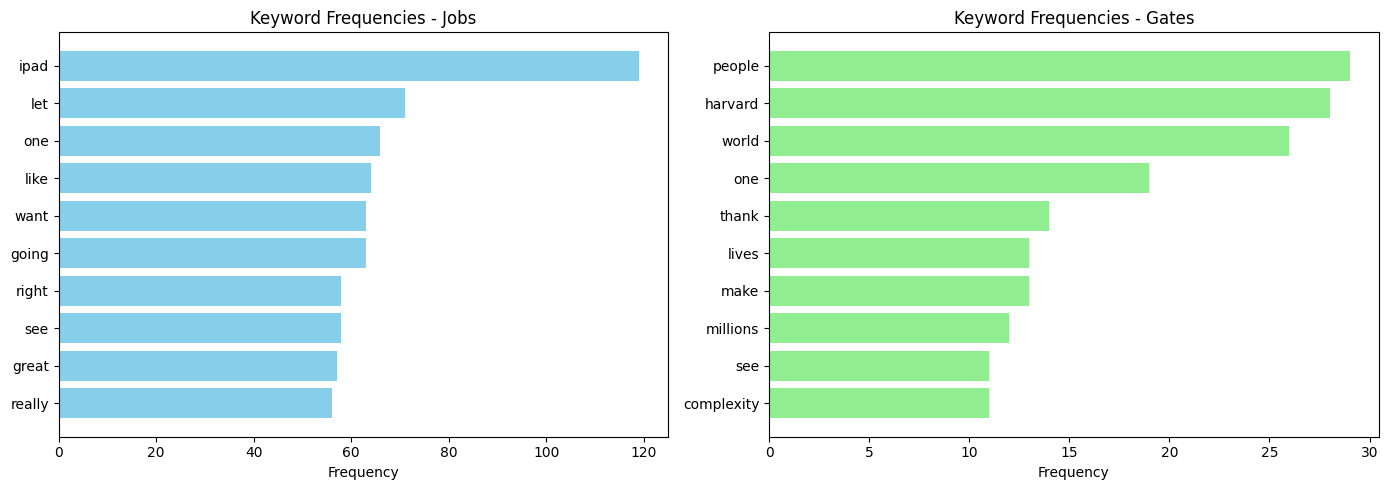

In [29]:
import matplotlib.pyplot as plt

tjobs = get_top(fjobs)
tgates = get_top(fgates)

def extract(lst,n):
  return [x[n] for x in lst]

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.barh(extract(tjobs,0), extract(tjobs,1), color='skyblue')
ax1.set_title('Keyword Frequencies - Jobs')
ax1.set_xlabel('Frequency')
ax1.invert_yaxis()

# Bar plot for fgates
ax2.barh(extract(tgates,0), extract(tgates,1), color='lightgreen')
ax2.set_title('Keyword Frequencies - Gates')
ax2.set_xlabel('Frequency')
ax2.invert_yaxis()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Давайте теперь сконцентрируемся отдельно только на позитивных словах. Ранее в уроках мы уже учились работать со словарём позитивных и негативных слов:

In [6]:
!wget http://www.soshnikov.com/permanent/data/positive-words.txt
!wget http://www.soshnikov.com/permanent/data/negative-words.txt

--2024-05-31 08:11:04--  http://www.soshnikov.com/permanent/data/positive-words.txt
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22408 (22K) [text/plain]
Saving to: ‘positive-words.txt’

positive-words.txt  100%[===================>]  21.88K  41.4KB/s    in 0.5s    

2024-05-31 08:11:06 (41.4 KB/s) - ‘positive-words.txt’ saved [22408/22408]

--2024-05-31 08:11:06--  http://www.soshnikov.com/permanent/data/negative-words.txt
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50857 (50K) [text/plain]
Saving to: ‘negative-words.txt’

negative-words.txt  100%[===================>]  49.67K  56.6KB/s    in 0.9s    

2024-05-31 08:11:07 (56.6 KB/s) - ‘negative-words.txt’ saved [5085

In [30]:
pos_set = set([x.strip() for x in open('positive-words.txt',encoding='latin-1').readlines() if not(x.startswith(';')) and x.strip()!=""])
neg_set = set([x.strip() for x in open('negative-words.txt',encoding='latin-1').readlines() if not(x.startswith(';')) and x.strip()!=""])


Опишем функцию извлечения топ-слов по частоте, которые при этом входят в заданное множество `wset`. При этом будем возвращать **относительную частоту** слова, т.е. число его вхождений, делённое на общую длину словаря. Так мы сможем сравнивать значения частоты для разных по длине текстов.

In [31]:
def get_top_set(freq, wset, n=10):
  return sorted([(w,100*f/len(freq)) for w,f in freq.items() if w in wset],key=lambda x:-x[1])[:n]


Построим это в виде графика:

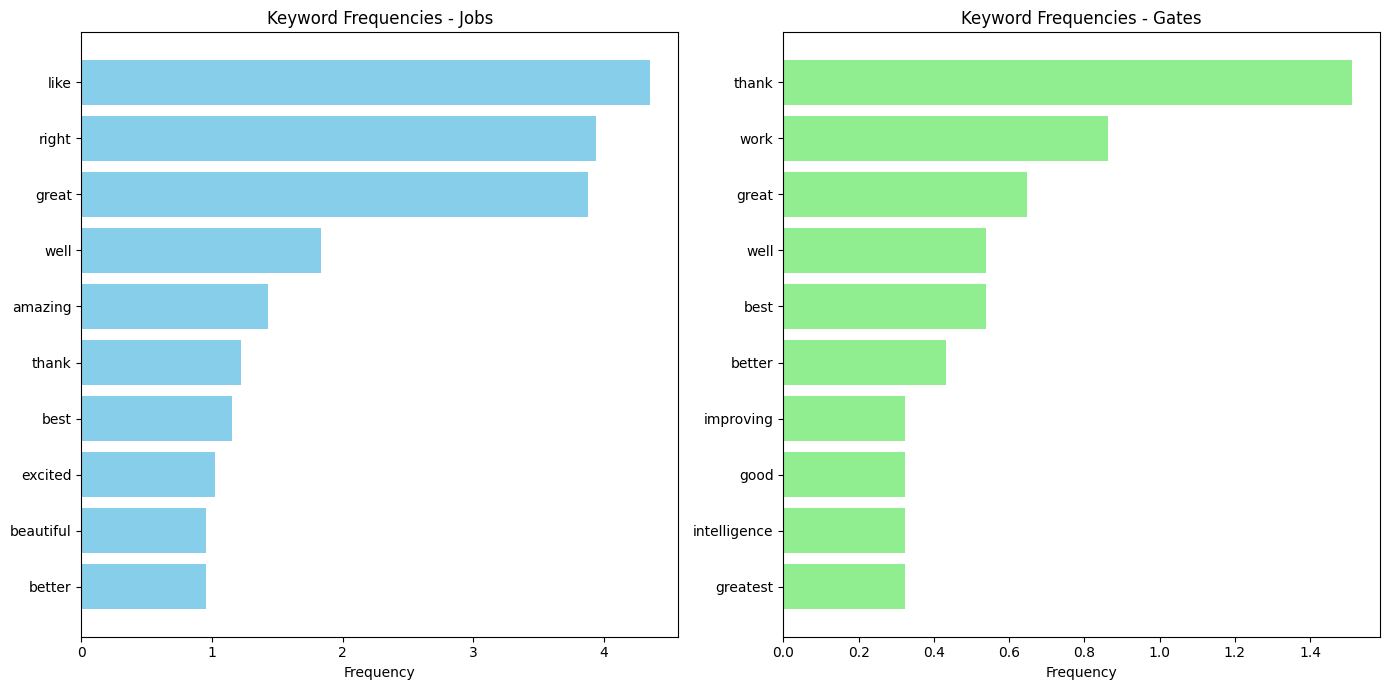

In [32]:
import matplotlib.pyplot as plt

tjobs = get_top_set(fjobs,pos_set)
tgates = get_top_set(fgates,pos_set)

def extract(lst,n):
  return [x[n] for x in lst]

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.barh(extract(tjobs,0), extract(tjobs,1), color='skyblue')
ax1.set_title('Keyword Frequencies - Jobs')
ax1.set_xlabel('Frequency')
ax1.invert_yaxis()

# Bar plot for fgates
ax2.barh(extract(tgates,0), extract(tgates,1), color='lightgreen')
ax2.set_title('Keyword Frequencies - Gates')
ax2.set_xlabel('Frequency')
ax2.invert_yaxis()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Теперь возьмём те слова, которые входят в оба списка top-10, и построим сравнительный график их относительной частоты:

In [33]:
tjobs_d = dict(tjobs)
tgates_d = dict(tgates)

combined = { k : (tjobs_d[k],tgates_d[k]) for k in set(tjobs_d.keys()) & set(tgates_d.keys()) }
combined

{'thank': (1.2244897959183674, 1.5102481121898597),
 'well': (1.836734693877551, 0.5393743257820928),
 'great': (3.877551020408163, 0.6472491909385113),
 'better': (0.9523809523809523, 0.43149946062567424),
 'best': (1.1564625850340136, 0.5393743257820928)}

При построении графика используем прием [Stacked Bar Plot](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html)

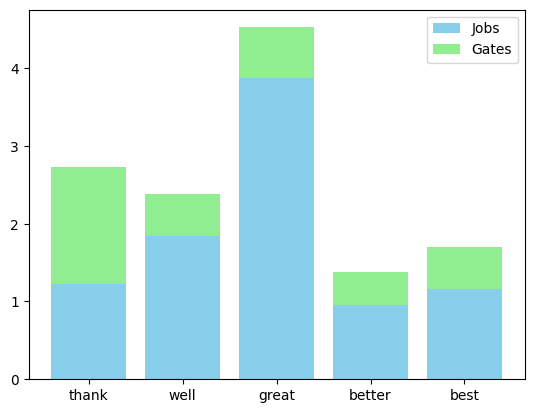

In [34]:
w = combined.keys()
f1 = [ f1 for k,(f1,f2) in combined.items() ]
f2 = [ f2 for k,(f1,f2) in combined.items() ]
plt.bar(w,f1,label='Jobs',color='skyblue')
plt.bar(w,f2,label='Gates',bottom=f1,color='lightgreen')
plt.legend()
plt.show()

### Делаем другие визуализации

Давайте подумаем, какие ещё визуализации текста можно предложить. Например, можем просто посчитать процент всех позитивных слов в тексте:

In [62]:
import numpy as np
import pandas as pd

wjobs = tokenizer.tokenize(jobs.lower())
wgates = tokenizer.tokenize(gates.lower())

def perc(txt,tset):
  return 100*np.mean([ int(x in tset) for x in txt ])

df = pd.DataFrame([
    { "Positive" : perc(wjobs,pos_set), "Negative" : perc(wjobs,neg_set) },
    { "Positive" : perc(wgates,pos_set), "Negative" : perc(wgates,neg_set) }],
                  index=["Jobs","Gates"])
df

,Positive,Negative
Jobs,4.861553,0.405792
Gates,4.176579,2.696273


<Axes: title={'center': '% of Positive and Negative Words in Text'}>

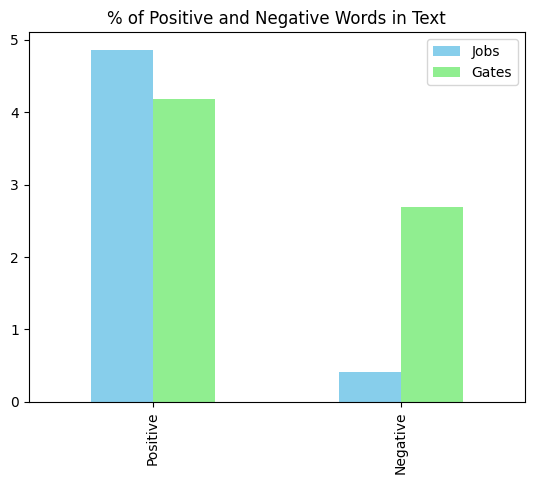

In [63]:
from matplotlib.colors import ListedColormap
cm = ListedColormap(['skyblue','lightgreen'])

df.T.plot.bar(colormap=cm,title='% of Positive and Negative Words in Text')

Про использование различных палитр для отображения цветов, читайте [тут](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

Мы можем смотреть на частоту использования позитивных слов в тексте. Для этого реализуем функцию, которая будет возвращать длины последовательностей обычных слов между позитивными.

> Такую функцию можно написать с помощью ChatGPT, дав, например, такой запрос: *I have a sequence of words `text`, and a set of positive words `pos_set`. I want to define python function that will return a sequence of numbers, showing how many non-positive words were between positive words in the text.*


In [35]:
def count_non_positive_between_positive(text, pos_set):
    result = []
    non_positive_count = 0
    positive_found = False

    for word in text:
        if word in pos_set:
            if positive_found:
                result.append(non_positive_count)
            positive_found = True
            non_positive_count = 0
        else:
            if positive_found:
                non_positive_count += 1

    return result

pjobs = count_non_positive_between_positive(wjobs,pos_set)
pgates = count_non_positive_between_positive(wgates,pos_set)

Для сравнения этих последовательностей можно сравнить средние значения, а также минимальные и максимальные. Это можно сделать с помощью удобной функции `describe` из Pandas:

In [64]:
df = pd.DataFrame({
    "Jobs" : pd.Series(pjobs).describe(),
    "Gates" : pd.Series(pgates).describe()
})
df

,Jobs,Gates
count,610.000000,157.000000
mean,19.596721,22.885350
std,22.260762,28.752027
min,0.000000,0.000000
25%,5.000000,6.000000
50%,12.000000,12.000000
75%,26.000000,28.000000
max,151.000000,181.000000


<Axes: title={'center': 'Mean and Max distance between positive words'}>

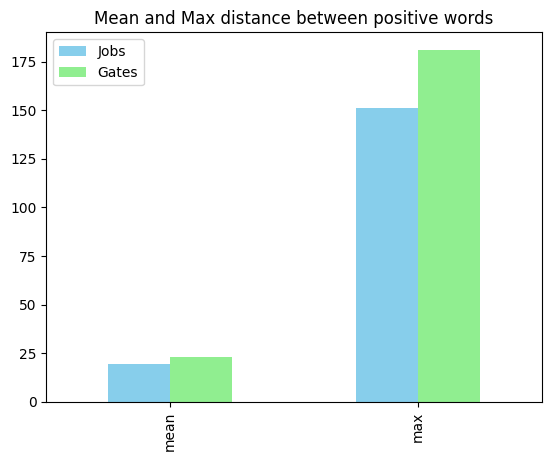

In [68]:
df.T[['mean','max']].T.plot.bar(colormap=cm,title='Mean and Max distance between positive words')

### Выводы

Мы сделали набор визуализаций в консистентном цветовом стиле, благодаря использованию colormaps. Из этих визуализаций можно собрать единую инфографику в каком-нибудь графическом редакторе (Figma). Мы сделали ряд содержательных выводов, подтверждённых графиками, только не основе исходных роликов в YouTube. Для большей статистической значимости результатов имеет смысл использовать большие по длине фрагменты видео.